In [162]:
import mne
import numpy as np
import pandas as pd
import networkx as nx
import connectivipy as cp 
from matplotlib import pyplot as plt, gridspec
import random
from random import randrange
from tqdm.notebook import tqdm

In [2]:
EO = mne.io.read_raw_edf("S059R01.edf")
eo_data = EO.to_data_frame()
eo_data = eo_data.drop(["time"], axis=1)
freq_eo = EO.info["sfreq"]
ch_eo = EO.ch_names

EC = mne.io.read_raw_edf("S059R02.edf")
ec_data = EC.to_data_frame()
ec_data = ec_data.drop(["time"], axis=1)
freq_ec = EC.info["sfreq"]
ch_ec = EC.ch_names

Extracting EDF parameters from /Users/yves/Desktop/Data_Science/second_year/BI/Project2/S059R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/yves/Desktop/Data_Science/second_year/BI/Project2/S059R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
EO.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [4]:
eo_data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
0,98.0,107.0,126.0,-101.0,34.0,240.0,-52.0,-36.0,-180.0,-352.0,...,-104.0,-172.0,-329.0,-363.0,-307.0,-68.0,-275.0,-334.0,-218.0,271.0
1,145.0,152.0,168.0,-76.0,50.0,247.0,-69.0,-6.0,-155.0,-332.0,...,-96.0,-158.0,-315.0,-352.0,-302.0,-63.0,-262.0,-328.0,-210.0,283.0
2,96.0,105.0,121.0,-73.0,59.0,252.0,-69.0,-4.0,-146.0,-319.0,...,-45.0,-112.0,-274.0,-324.0,-264.0,-18.0,-219.0,-289.0,-170.0,327.0
3,110.0,116.0,136.0,-50.0,86.0,272.0,-48.0,30.0,-117.0,-294.0,...,-32.0,-108.0,-280.0,-329.0,-262.0,-8.0,-216.0,-287.0,-162.0,325.0
4,103.0,110.0,129.0,-64.0,71.0,258.0,-61.0,20.0,-129.0,-310.0,...,-32.0,-130.0,-297.0,-339.0,-270.0,-22.0,-231.0,-302.0,-177.0,295.0


# Basic visualizations

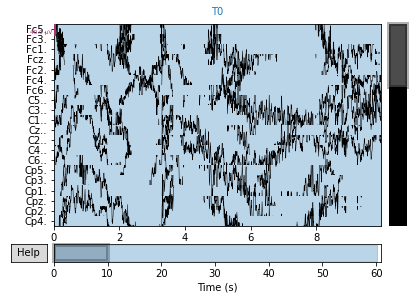

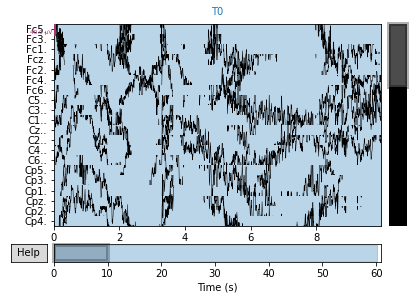

In [5]:
EO.plot()

(-800.0, 800.0)

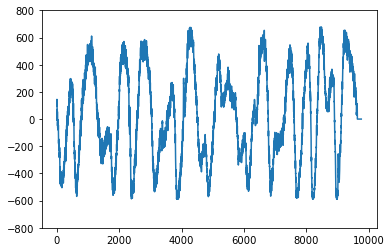

In [6]:
plt.plot(eo_data["Fc5."])
plt.ylim(-800,800)

(-800.0, 800.0)

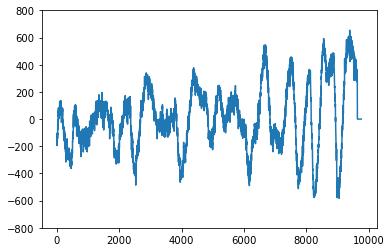

In [7]:
plt.plot(eo_data["Po7."])
plt.ylim(-800,800)

# Creating the networks

## Eyes Open

In [8]:
print(type(eo_data))
eo = eo_data.values.T
eo.shape

<class 'pandas.core.frame.DataFrame'>


(64, 9760)

In [9]:
obj = cp.mvarmodel.Mvar()
best_order, crit = obj.order_akaike(eo, p_max=15, method='yw')
print(best_order)

/Users/yves/opt/miniconda3/envs/mne/lib/python3.8/site-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


8


In [10]:
Av, Vf = cp.mvar.fitting.yulewalker(eo, best_order)

In [11]:
Av.shape

(8, 64, 64)

In [12]:
pdc = cp.conn.pdc_fun(Av, Vf, freq_eo, 100)

In [13]:
pdc.shape

(100, 64, 64)

In [14]:
ex1 = pdc[12]
vec =  np.linspace(0.122,0.123,11)
"""
for el in vec:
  print(el)
  ope = np.where(ex1<=(el),0,1)
  g1 = nx.DiGraph(ope)
  print(nx.density(g1))
  print()
"""

'\nfor el in vec:\n  print(el)\n  ope = np.where(ex1<=(el),0,1)\n  g1 = nx.DiGraph(ope)\n  print(nx.density(g1))\n  print()\n'

In [15]:
#preparing coordinates
cor = pd.read_csv('channel_locations.csv', index_col=0)
cor = cor.sort_values(by=["label"])
cor = cor.reset_index()
cor.head()

,index,label,x,y
0,26,Af3,-0.134021,0.315733
1,28,Af4,0.134021,0.315733
2,25,Af7,-0.238641,0.328461
3,29,Af8,0.238641,0.328461
4,27,Afz,0.000000,0.304000


In [16]:
#preparing labels
names_ch = [s.replace('.', '') for s in ch_eo]
chiavi_tot = [i for i in range(64)]
label_mapping_tot = {c:0 for c in chiavi_tot}
for c in chiavi_tot:
  label_mapping_tot[c] = names_ch[c]

#label_mapping_tot

In [17]:
names_ch = [s.replace('.', '') for s in ch_eo]
coords_tot = {n:() for n in names_ch}
names_ch.sort()
#print(names_ch == list(coords_tot.keys()))
for k in range(64):
  coords_tot[names_ch[k]] = (cor.iloc[k]["x"], cor.iloc[k]["y"])

#coords_tot

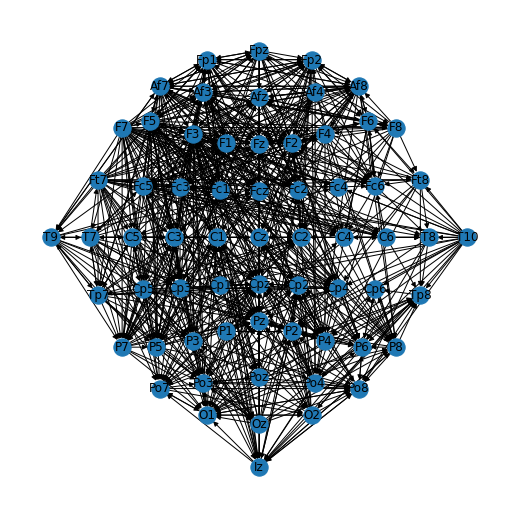

In [18]:
adj1 = np.where(ex1<=(0.1225),0,1) #ADJ MATRIX
g1 = nx.DiGraph(adj1)
g1 = nx.relabel_nodes(g1, label_mapping_tot)
nx.set_node_attributes(g1, coords_tot, 'coord')

#print("La densità del grafo è",round(nx.density(g1),2))
#print()
plt.figure(1,figsize=(7,7))
nx.draw(g1, with_labels=True, pos=coords_tot)

## Eyes Closed

In [19]:
ec = ec_data.values.T
ec.shape

(64, 9760)

In [20]:
best_order2, crit2 = obj.order_akaike(ec, p_max=15, method='yw')
print(best_order2)

/Users/yves/opt/miniconda3/envs/mne/lib/python3.8/site-packages/connectivipy/mvar/fitting.py:267: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  req = np.vstack(rr_b[:, :, x].T for x in range(1, pmax+1))


7


In [21]:
Av2, Vf2 = cp.mvar.fitting.yulewalker(ec, best_order2)
pdc2 = cp.conn.pdc_fun(Av2, Vf2, freq_ec, 100)

In [22]:
ex2 = pdc2[12]
vec =  np.linspace(0.122,0.123,11)
"""
for el in vec:
  print(el)
  clo = np.where(ex2<=(el),0,1)
  g2 = nx.DiGraph(clo)
  print(nx.density(g2))
  print()
"""

'\nfor el in vec:\n  print(el)\n  clo = np.where(ex2<=(el),0,1)\n  g2 = nx.DiGraph(clo)\n  print(nx.density(g2))\n  print()\n'

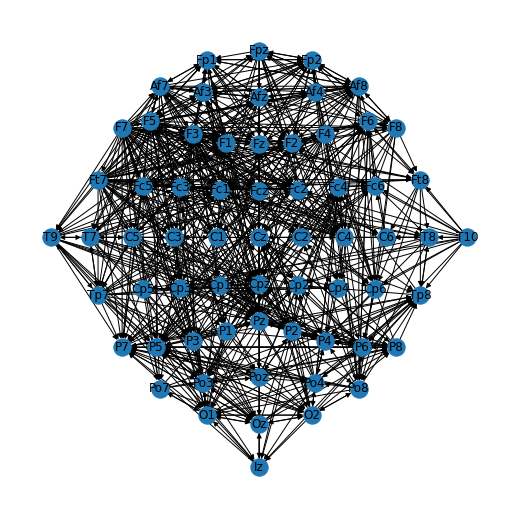

In [23]:
adj2 = np.where(ex2<=(0.1225),0,1) #ADJ MATRIX
g2 = nx.DiGraph(adj2)
g2 = nx.relabel_nodes(g2, label_mapping_tot)
nx.set_node_attributes(g2, coords_tot, 'coord')

#print("La densità del grafo è",round(nx.density(g2),2))
#print()
plt.figure(1,figsize=(7,7))
nx.draw(g2, with_labels=True, pos=coords_tot)

# Motif analysis

#####  3.1 

(mandatory) Perform motifs analysis to investigate the presence of 3-node configurations in the networks: determine their frequency and statistical significance (motifs, anti-motifs).

In [66]:
def triad_patterns():
    """Patterns of all 16 triads
    Returns
    -------
    patterns : list of 3x3 arrays
        The adjacency matrices of all 16 triads.
    """
    patterns = [
        # No edge
        np.array([[0,0,0], [0,0,0], [0,0,0]]),      #0
        # One edge
        np.array([[0,1,0], [0,0,0], [0,0,0]]),      #1
        np.array([[0,1,0], [1,0,0], [0,0,0]]),      #2
        # Two edges
        np.array([[0,1,0], [0,0,0], [1,0,0]]),      #4
        np.array([[0,0,0], [1,0,0], [1,0,0]]),      #3
        np.array([[0,1,1], [0,0,0], [0,0,0]]),      #5
        # Three edges
        np.array([[0,1,1], [0,0,1], [0,0,0]]),      #7
        np.array([[0,0,0], [0,0,1], [1,1,0]]),      #8
        np.array([[0,1,0], [0,0,1], [0,1,0]]),      #6
        np.array([[0,1,0], [0,0,1], [1,0,0]]),      #9
        # Four edges
        np.array([[0,1,1], [1,0,0], [1,0,0]]),      #11
        np.array([[0,1,0], [0,0,1], [1,1,0]]),      #12
        np.array([[0,0,0], [1,0,1], [1,1,0]]),      #13
        np.array([[0,1,1], [0,0,1], [0,1,0]]),      #10
        # Five edges
        np.array([[0,1,1], [1,0,1], [1,0,0]]),      #14
        # Six edges
        np.array([[0,1,1], [1,0,1], [1,1,0]])       #15
    ]
    return patterns

In [121]:
def Motifs(M3):
    mot_ = triad_patterns()

    W = np.zeros((16,)).astype(int) 
    l = []
    for ind_mot in range(len(mot_)):
        for j in range(len(M3)-2):
            for i in range(len(M3[0])-2):
                X_i_j = [row[0+i:3+i] for row in M3[0+j:3+j]]
                x = np.array(X_i_j)
                if (x == mot_[ind_mot]).all() :
                    W[ind_mot] += 1
                    l = x
    return W
    #return l

In [368]:
def bar_motifs(bar, line=None, order=None, title=None):
    if order is None:
        order = list(range(len(bar))) if bar[0]>-1 else default_triad_order

    x = 1 + np.arange(13)
    
    order = order[3:]
    
    plt.figure(figsize=(25,20))
    gs = gridspec.GridSpec(2, 1, wspace=0.0, hspace=0.0, height_ratios=[10, 3])
    ax0 = plt.subplot(gs[0])
    ax0.bar(x, bar[order])
    if line is not None:
        ax0.plot(x, line[order], '-oy')
    
    
    N = 50
    plt.xticks(range(1,14)) # add loads of ticks
    plt.grid()

    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
    tl = plt.gca().get_xticklabels()
    maxsize = max([t.get_window_extent().width for t in tl])
    m = 1 # inch margin
    s = maxsize/plt.gcf().dpi*N+2*m
    margin = m/plt.gcf().get_size_inches()[0]

    plt.gcf().subplots_adjust(left=margin, right=1.-margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
    ax0.grid(False)
    
    xlocs, xlabs = plt.xticks()
    for i, v in enumerate(bar[3:]):
        if v > 0:
            plt.text(xlocs[i] - 0.25, v + 0.1, str(round(v/sum(bar[3:]), 3)))

    if title is not None:
        plt.title(title)

    ax1 = plt.subplot(gs[1], sharex=ax0)
    plot_all_triads(order, ax=ax1, label=False)
    plt.axis('off')
    
    #plt.savefig('new_bar_2.png', dpi=100)

    

In [123]:
def plot_a_triad(tid, o=(0, 0), r=1, phi=np.pi / 2, label=True,
                 arrow_color=None, head_width=0.10,
                 nodes=True, node_color=None, node_size=50, node_alpha=.8,
                 bg_color=None, ax=None):
    
    motif = triad_patterns()[tid] if np.isscalar(tid) else tid
    xy = o+r*np.array([[np.cos(-2*np.pi*a+phi), np.sin(-2*np.pi*a+phi)] for a in np.arange(3)/3.0])

    scale = 0.75

    ax = ax or plt.gca()
    arrow_color = arrow_color or ax.get_xticklabels()[0].get_color()
    
    # ax.plot(xy.T[0],xy.T[1],'.')

    if nodes:
        ax.scatter(xy.T[0], xy.T[1], color=node_color, s=node_size, alpha=node_alpha)

    h = [ax.arrow(xy[i,0], xy[i,1],
                  scale*(xy[j,0]-xy[i,0]), scale*(xy[j,1]-xy[i,1]),
                  head_width=head_width, color=arrow_color, fc=arrow_color, ec=arrow_color)
         for (i, j) in zip(*motif.nonzero())]
    if label is not False:
        if label is True:
            label = tid
        ax.text(o[0], o[1], "%s" % label, horizontalalignment="center", verticalalignment="center", fontsize=12)

    if bg_color:
        bg = plt.Polygon(xy, color=bg_color)
        ax.add_patch(bg)

    return h

In [124]:
tidd = list(range(13))
def plot_all_triads(order=tidd, o=(1, 0), delta=(1, 0), r=.5, **kwargs):
    [plot_a_triad(order[i], o=np.array(o) + np.array([i * delta[0], np.mod(i, 2) * delta[1]]), r=r, **kwargs) for i in range(len(order))]
    plt.axis('equal')

In [125]:
Motifs(adj1)

array([1551,   75,    3,    3,   42,   22,   11,    1,    2,    0,    1,
          0,    0,    6,    0,    0])

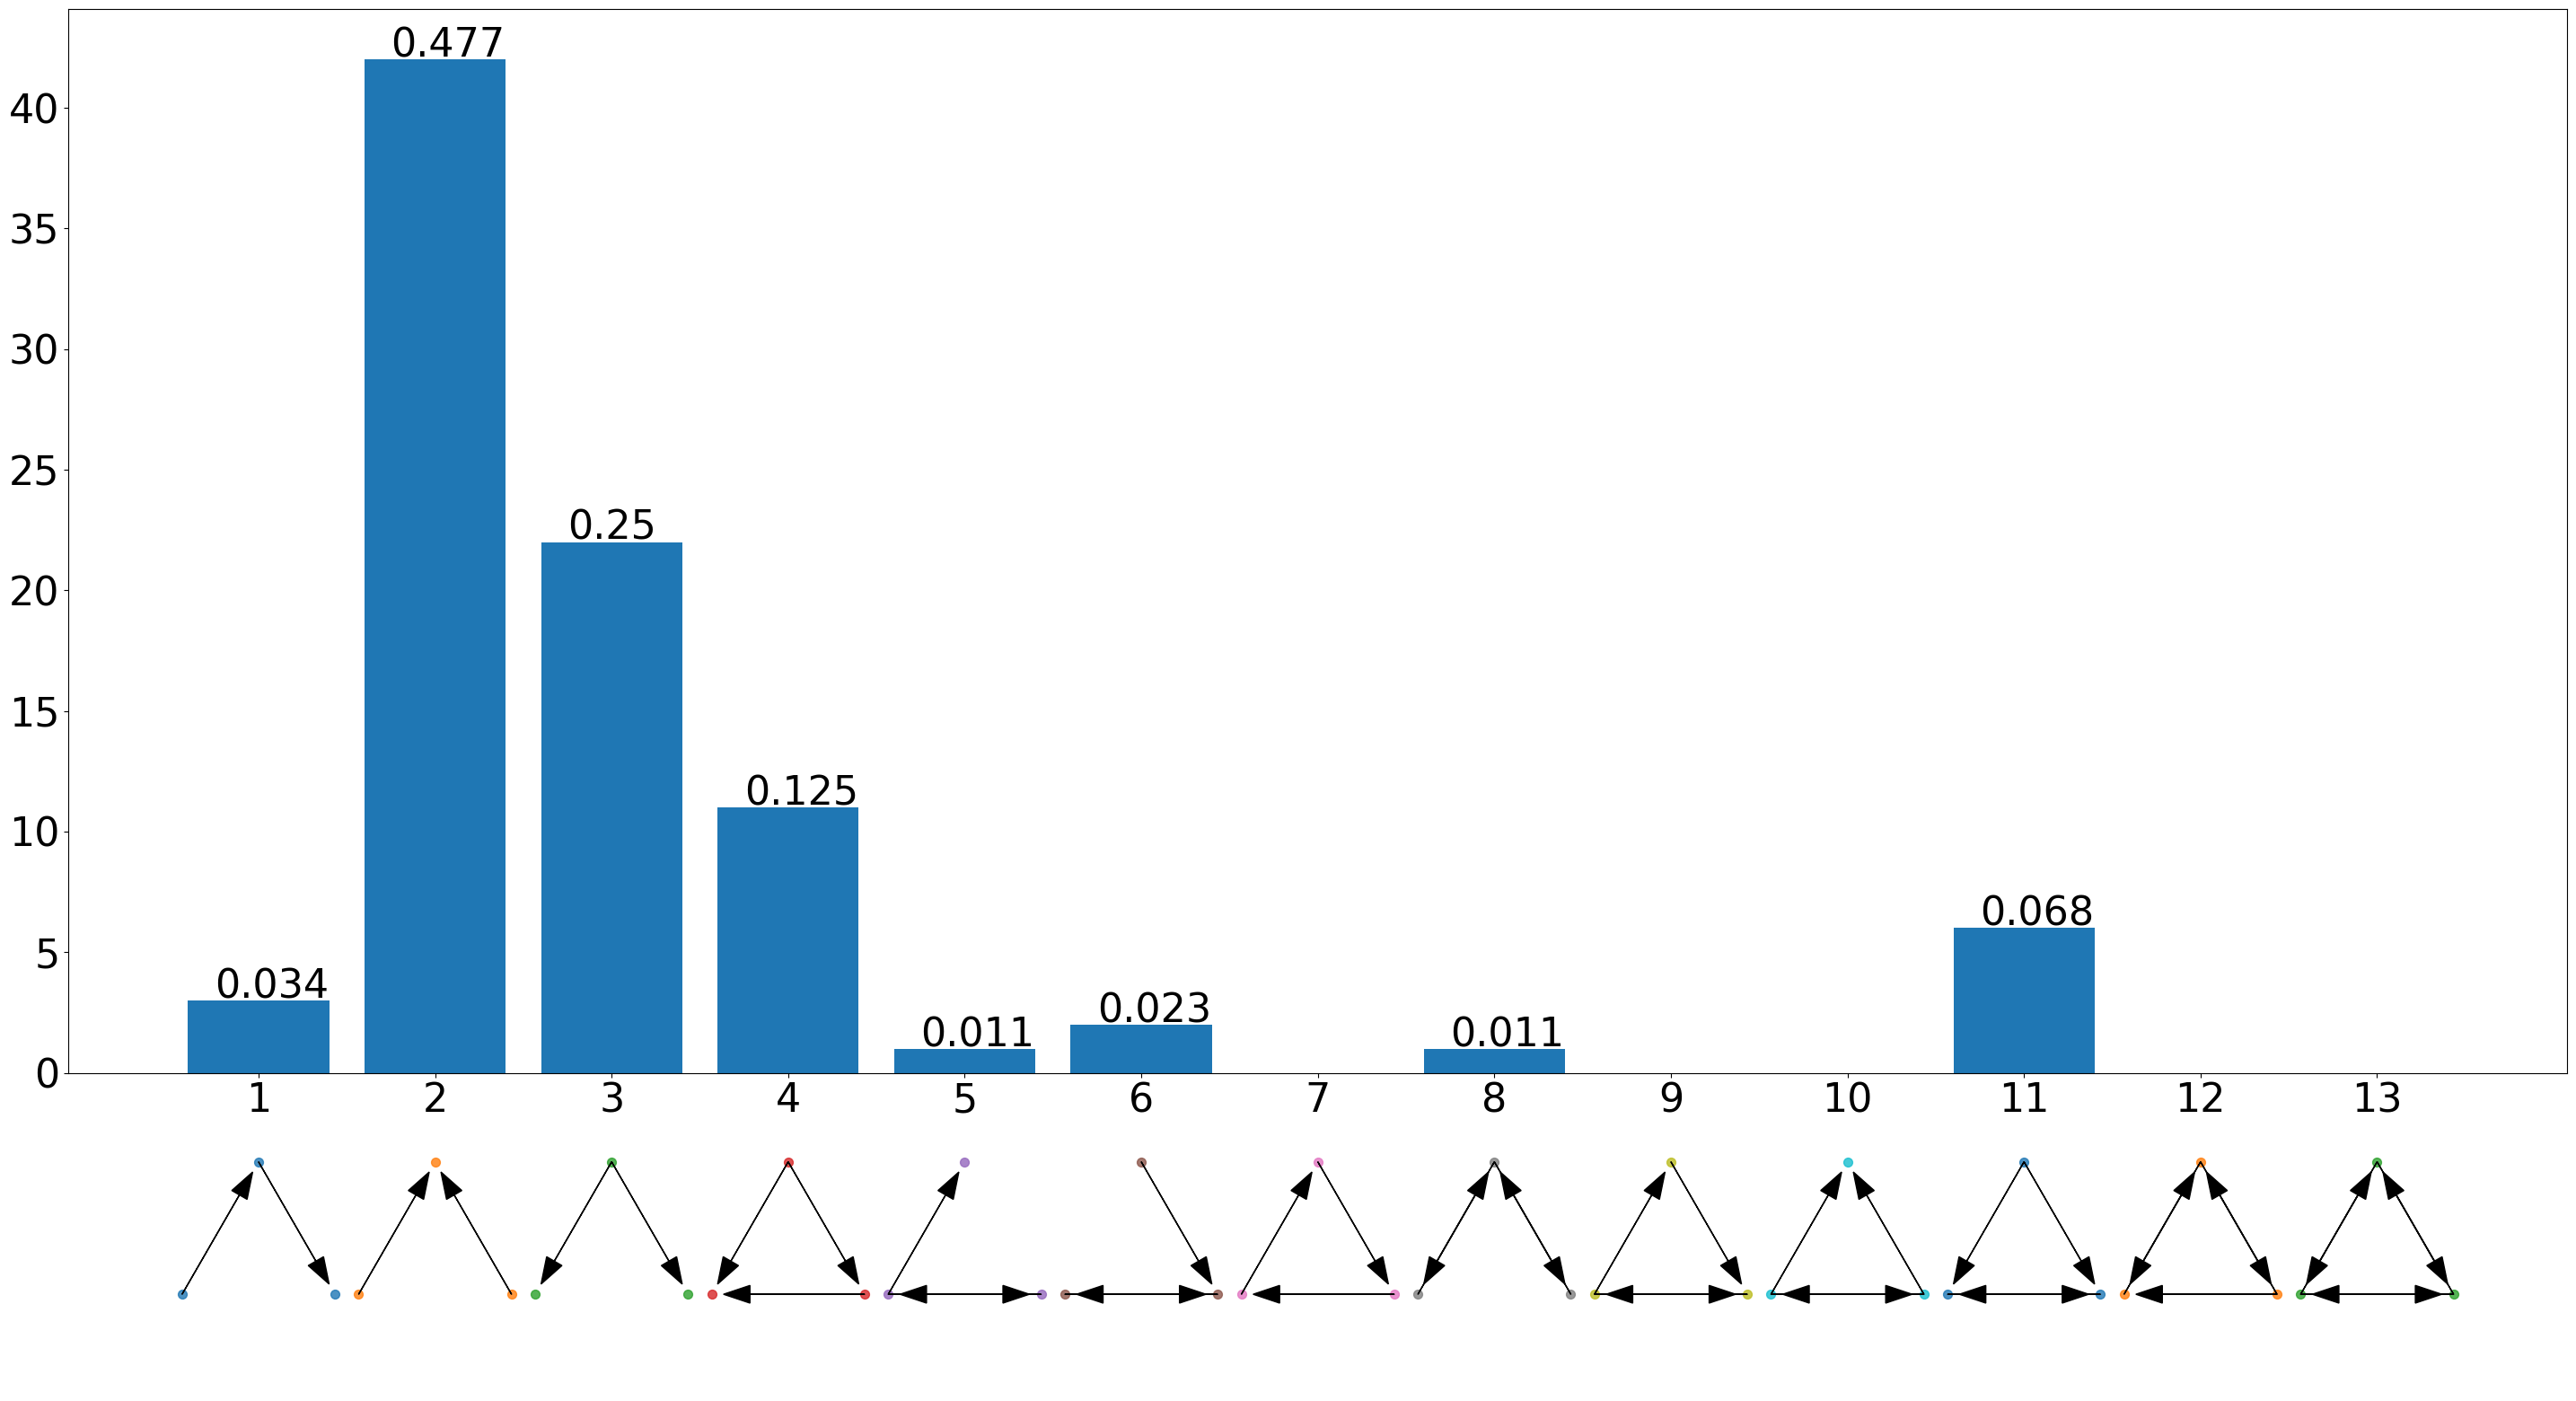

In [344]:
plt.rcParams.update({'font.size': 32})
out = bar_motifs(Motifs(adj1))

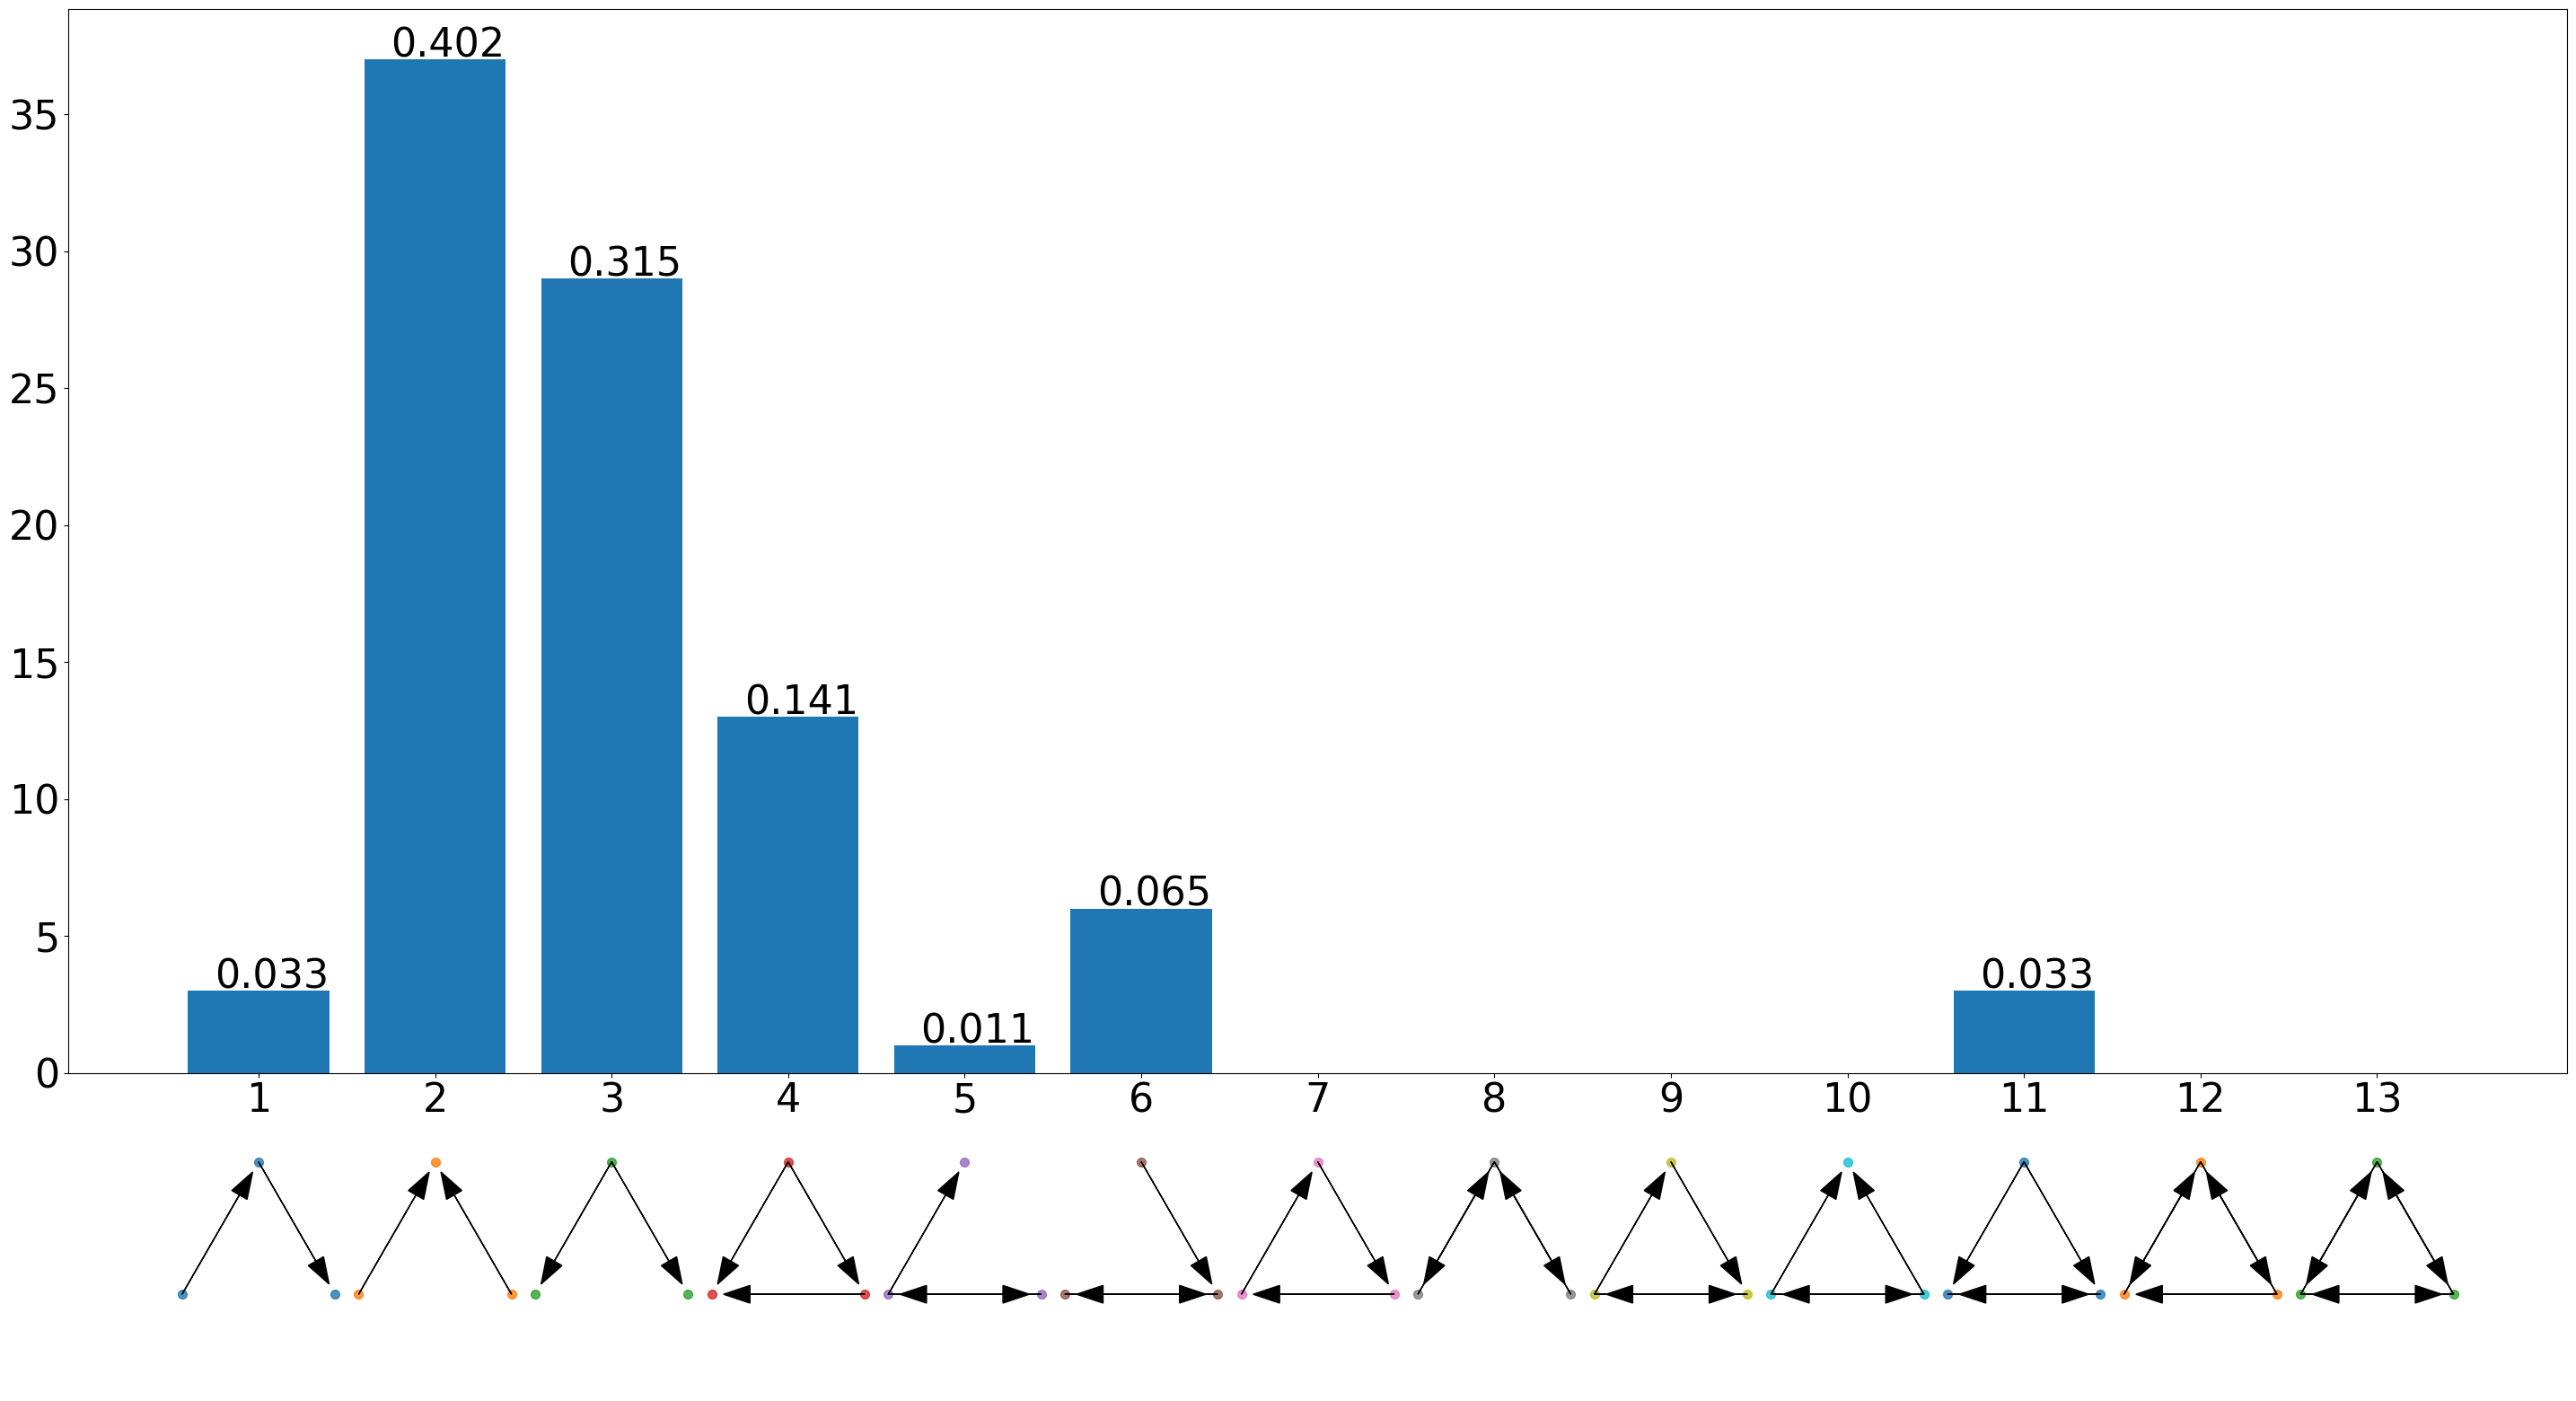

In [342]:
plt.rcParams.update({'font.size': 32})
_ = bar_motifs(Motifs(adj2))

In [143]:
def create_rand(con_in,con_out):  # create random graph, given the number of in and out links
                                    #per node
    IN = [[] for i in range(64)]
    OUT = [[] for i in range(64)]

    node = 0
    while node<= 63:
        rand = randrange(64)
        if len(IN[node]) < con_in[node]:
            if len(OUT[rand]) < con_out[rand]:
                IN[node].append((node,rand))
                OUT[rand].append(node)
            else:
                continue
        else:
            node += 1

    G = nx.DiGraph()  
    for al in IN:
        G.add_edges_from(al)

    ADJ = nx.adjacency_matrix(G)
    ADJ = ADJ.todense()
    ADJ = np.squeeze(np.asarray(ADJ)) # convert numpy matrix to ndarray
    return ADJ

In [236]:
def Motifs_Rand_graphs(Graph, number):   #### Motif Analysis
    
    ## GET THE IN AND OUT LINKS FROM THE NODES
    con_in_1 = [len(list(Graph.in_edges(i))) for i in list(Graph.nodes())]
    con_out_1 = [len(list(Graph.out_edges(i))) for i in list(Graph.nodes())]
    
    ## CREATE RANDOM GRAPH WHERE THE NODES HAVE THE SAME NUMBER OF IN/OUT LINKS
    OUT = []
    for i in range(number):
        OUT.append(Motifs(create_rand(con_in_1, con_out_1)))
        if i % 100 == 0 and i != 0:
            print(i, "Done")
    OUT = list(zip(*OUT))
    
    return OUT

In [ ]:
OUT_1 = Motifs_Rand_graphs(g1, 5000)
OUT_2 = Motifs_Rand_graphs(g2, 5000)

In [244]:
out_1 = Motifs(adj1)
out_2 = Motifs(adj2)

In [367]:
plt.rcParams.update({'font.size': 10})
from matplotlib.pyplot import text
import collections

def Plot_compare_Motifs(rand_mot, my_motifs):
    
    rand_mot = rand_mot[3:]
    my_motifs = my_motifs[3:]
    
    real_motifs = []
    
    for i in range(len(my_motifs)):    
        if val > np.percentile(rand_mot[i], 95) or val < np.percentile(rand_mot[i], 5): 
                real_motifs.append(i+1)
                fig = plt.figure(figsize = (8,4))
                res = plt.hist(rand_mot[i], color = 'lightskyblue', edgecolor = 'black', bins = 33)
                plt.title( "motif number" + str(i+1))
                plt.axvline(val, color='red', linestyle='dashed', ls=':', lw=2, label ="Original Motif")
                plt.legend()
                plt.legend(loc='upper right')
                # get the correct y where to write text
                max_frq = collections.Counter(rand_mot[i])
                max_frq = max(max_frq.values())
                #text(val, max_frq/2, "Original Motif", rotation=90, verticalalignment='center')
                #plt.text(val, int(np.mean(rand_mot[i])), 'sample {i}'.format(i=val))
                #plt.savefig('motif_New_2' + str(i+1) + '.png', dpi=100)
                plt.show()
                

-3.6496587951336212


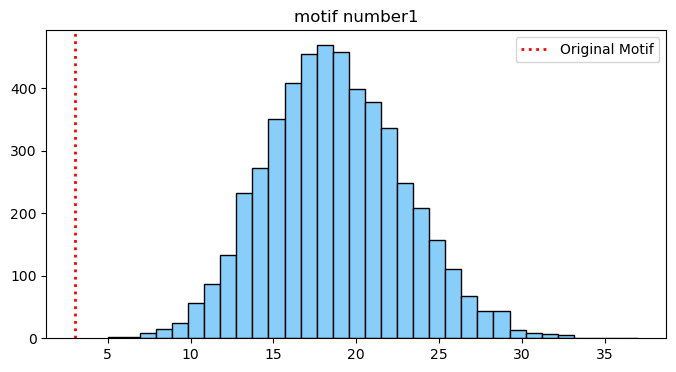

2.196068200089344


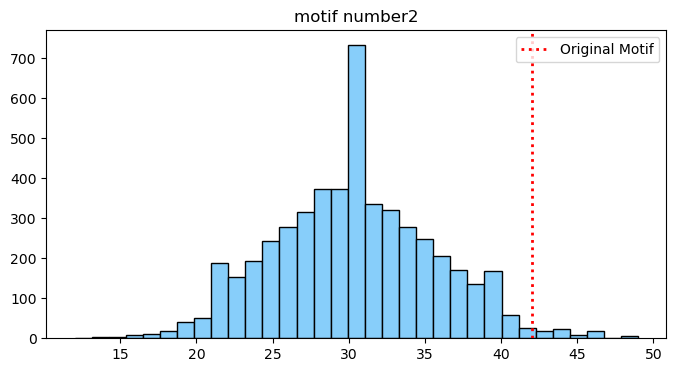

-1.9409691231029438


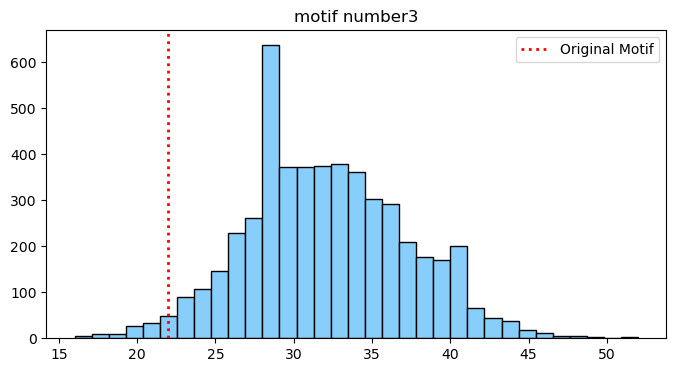

2.1419807891853067


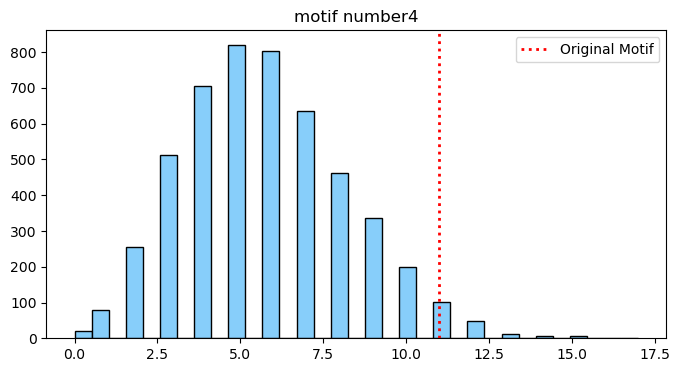

-1.6233723512391662
-0.8715758040134194
-1.547327023943164
0.107007611000468
-0.8446520780525946
-1.0657225166630517
5.0402901489285625


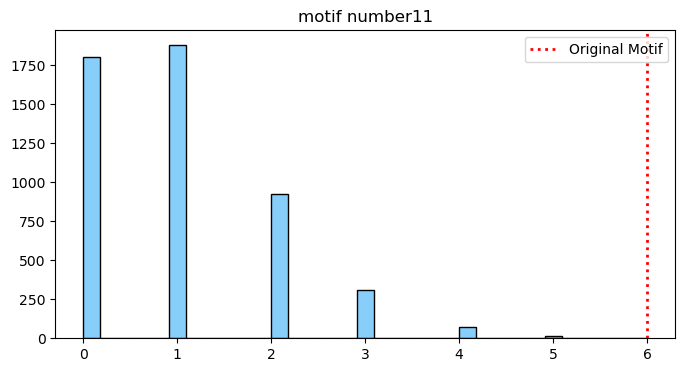

-0.44801199444691864
-0.2359025316010637


In [348]:
Plot_compare_Motifs(OUT_1, out_1)

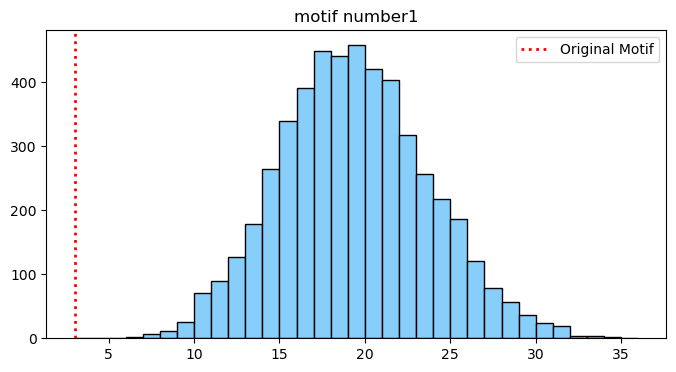

In [336]:
Plot_compare_Motifs(OUT_2, out_2)

##### 3.2 

(class ‘C’) For the motif with pattern A → B ← C, create a topographical representation of the networks considering only the connections involved in this configuration.

In [352]:
# WE ONLY SAVE THE EDGES INVOLVED IN THIS TYPE OD MOTIFS
def Motifs_3(M3):
    mot_ = triad_patterns()
    out = np.zeros((16,))
    l = []
    for ind_mot in range(len(mot_)):
        if ind_mot == 4:  # NEW LINE
            for j in range(len(M3)-2):
                for i in range(len(M3[0])-2):
                    
                    X_i_j = [row[0+i:3+i] for row in M3[0+j:3+j]]
                    
                    x = np.array(X_i_j)
                    if x.shape == (3,3):
                        if (x == mot_[ind_mot]).all() :
                            out[ind_mot] += 1
                            l.append([j+1, i])
                            l.append([j+2, i])
    return l

In [353]:
good_edges = Motifs_3(adj2)

In [354]:
new_adj = np.zeros((64,64))
for i in good_edges:
    new_adj[i[0], i[1]] = 1
new_adj = new_adj.astype(int)

In [355]:
central = ["Fc5", "Fc3", "Fc1", "Fcz", "Fc2", "Fc4", "Fc6", "C5", "C3", "C1", "Cz", "C2", "C4", "C6", "Cp5", "Cp3", "Cp1", "Cpz", "Cp2", "Cp4", "Cp6" ]
frontal = ["Fp1", "Fpz", "Fp2", "Af7", "Af3", "Afz", "Af4", "Af8", "F7", "F5", "F3", "F1", "Fz", "F2", "F4", "F6", "F8"]
temporal = ["Ft7", "Ft8", "T7", "T8", "T9", "T10", "Tp7", "Tp8"]
parietal = ["P7", "P5", "P3", "P1", "Pz", "P2", "P4", "P6", "P8", "Po7", "Po3", "Poz", "Po4", "Po8"]
occipital = ["O1", "Oz", "O2", "Iz"]

color_map = []
for node in g1:
    if node in central:
        color_map.append('gold')
    elif node in frontal:
        color_map.append("coral")
    elif node in temporal:
        color_map.append("yellowgreen")
    elif node in parietal: 
        color_map.append("skyblue") 
    elif node in occipital:
        color_map.append("plum")
    else:
        print(node)
    

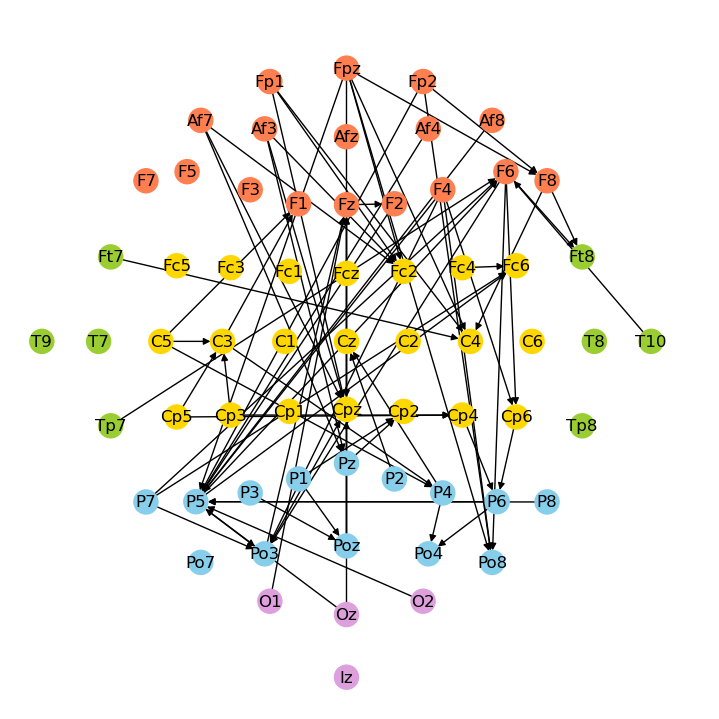

In [356]:
GG = nx.DiGraph(new_adj)
GG = nx.relabel_nodes(GG, label_mapping_tot)
nx.set_node_attributes(GG, coords_tot, 'coord')

#print("La densità del grafo è",round(nx.density(g2),2))
#print()
plt.figure(1,figsize=(7,7))
nx.draw(GG, with_labels=True, pos=coords_tot, node_color=color_map)

##### 3.2

(class ‘C’) Choose a channel selected in parieto-occipital scalp region and determine the
motifs which involve it.

In [349]:
def create_subregion_adj(EO_Data, ADJ, region):
    # SELECT THW PARIETO-OCCIPITAL SCALP REGION DATA

    good_columns_index = []
    good_columns_names = []
    for i in list(EO_Data.columns):
        if 'Po' in i.split('.')[0]:
            good_columns_index.append(list(EO_Data.columns).index(i))
            good_columns_names.append(i)

    ### GET ALL IN AND OUT LINKS INVOLINGS THESE COLUMNS

    to_save = []
    for i in good_columns_index:
        for j in range(len(ADJ[:,i])):
            if ADJ[j,i] == 1:
                to_save.append(j)

    New_adj = ADJ[:, list(set(to_save))]
    New_adj = New_adj[list(set(to_save)), :]
    
    return New_adj

In [358]:
New_adj2 = create_subregion_adj(ec_data, adj2, 'Po')
New_adj1 = create_subregion_adj(eo_data, adj1, 'Po')

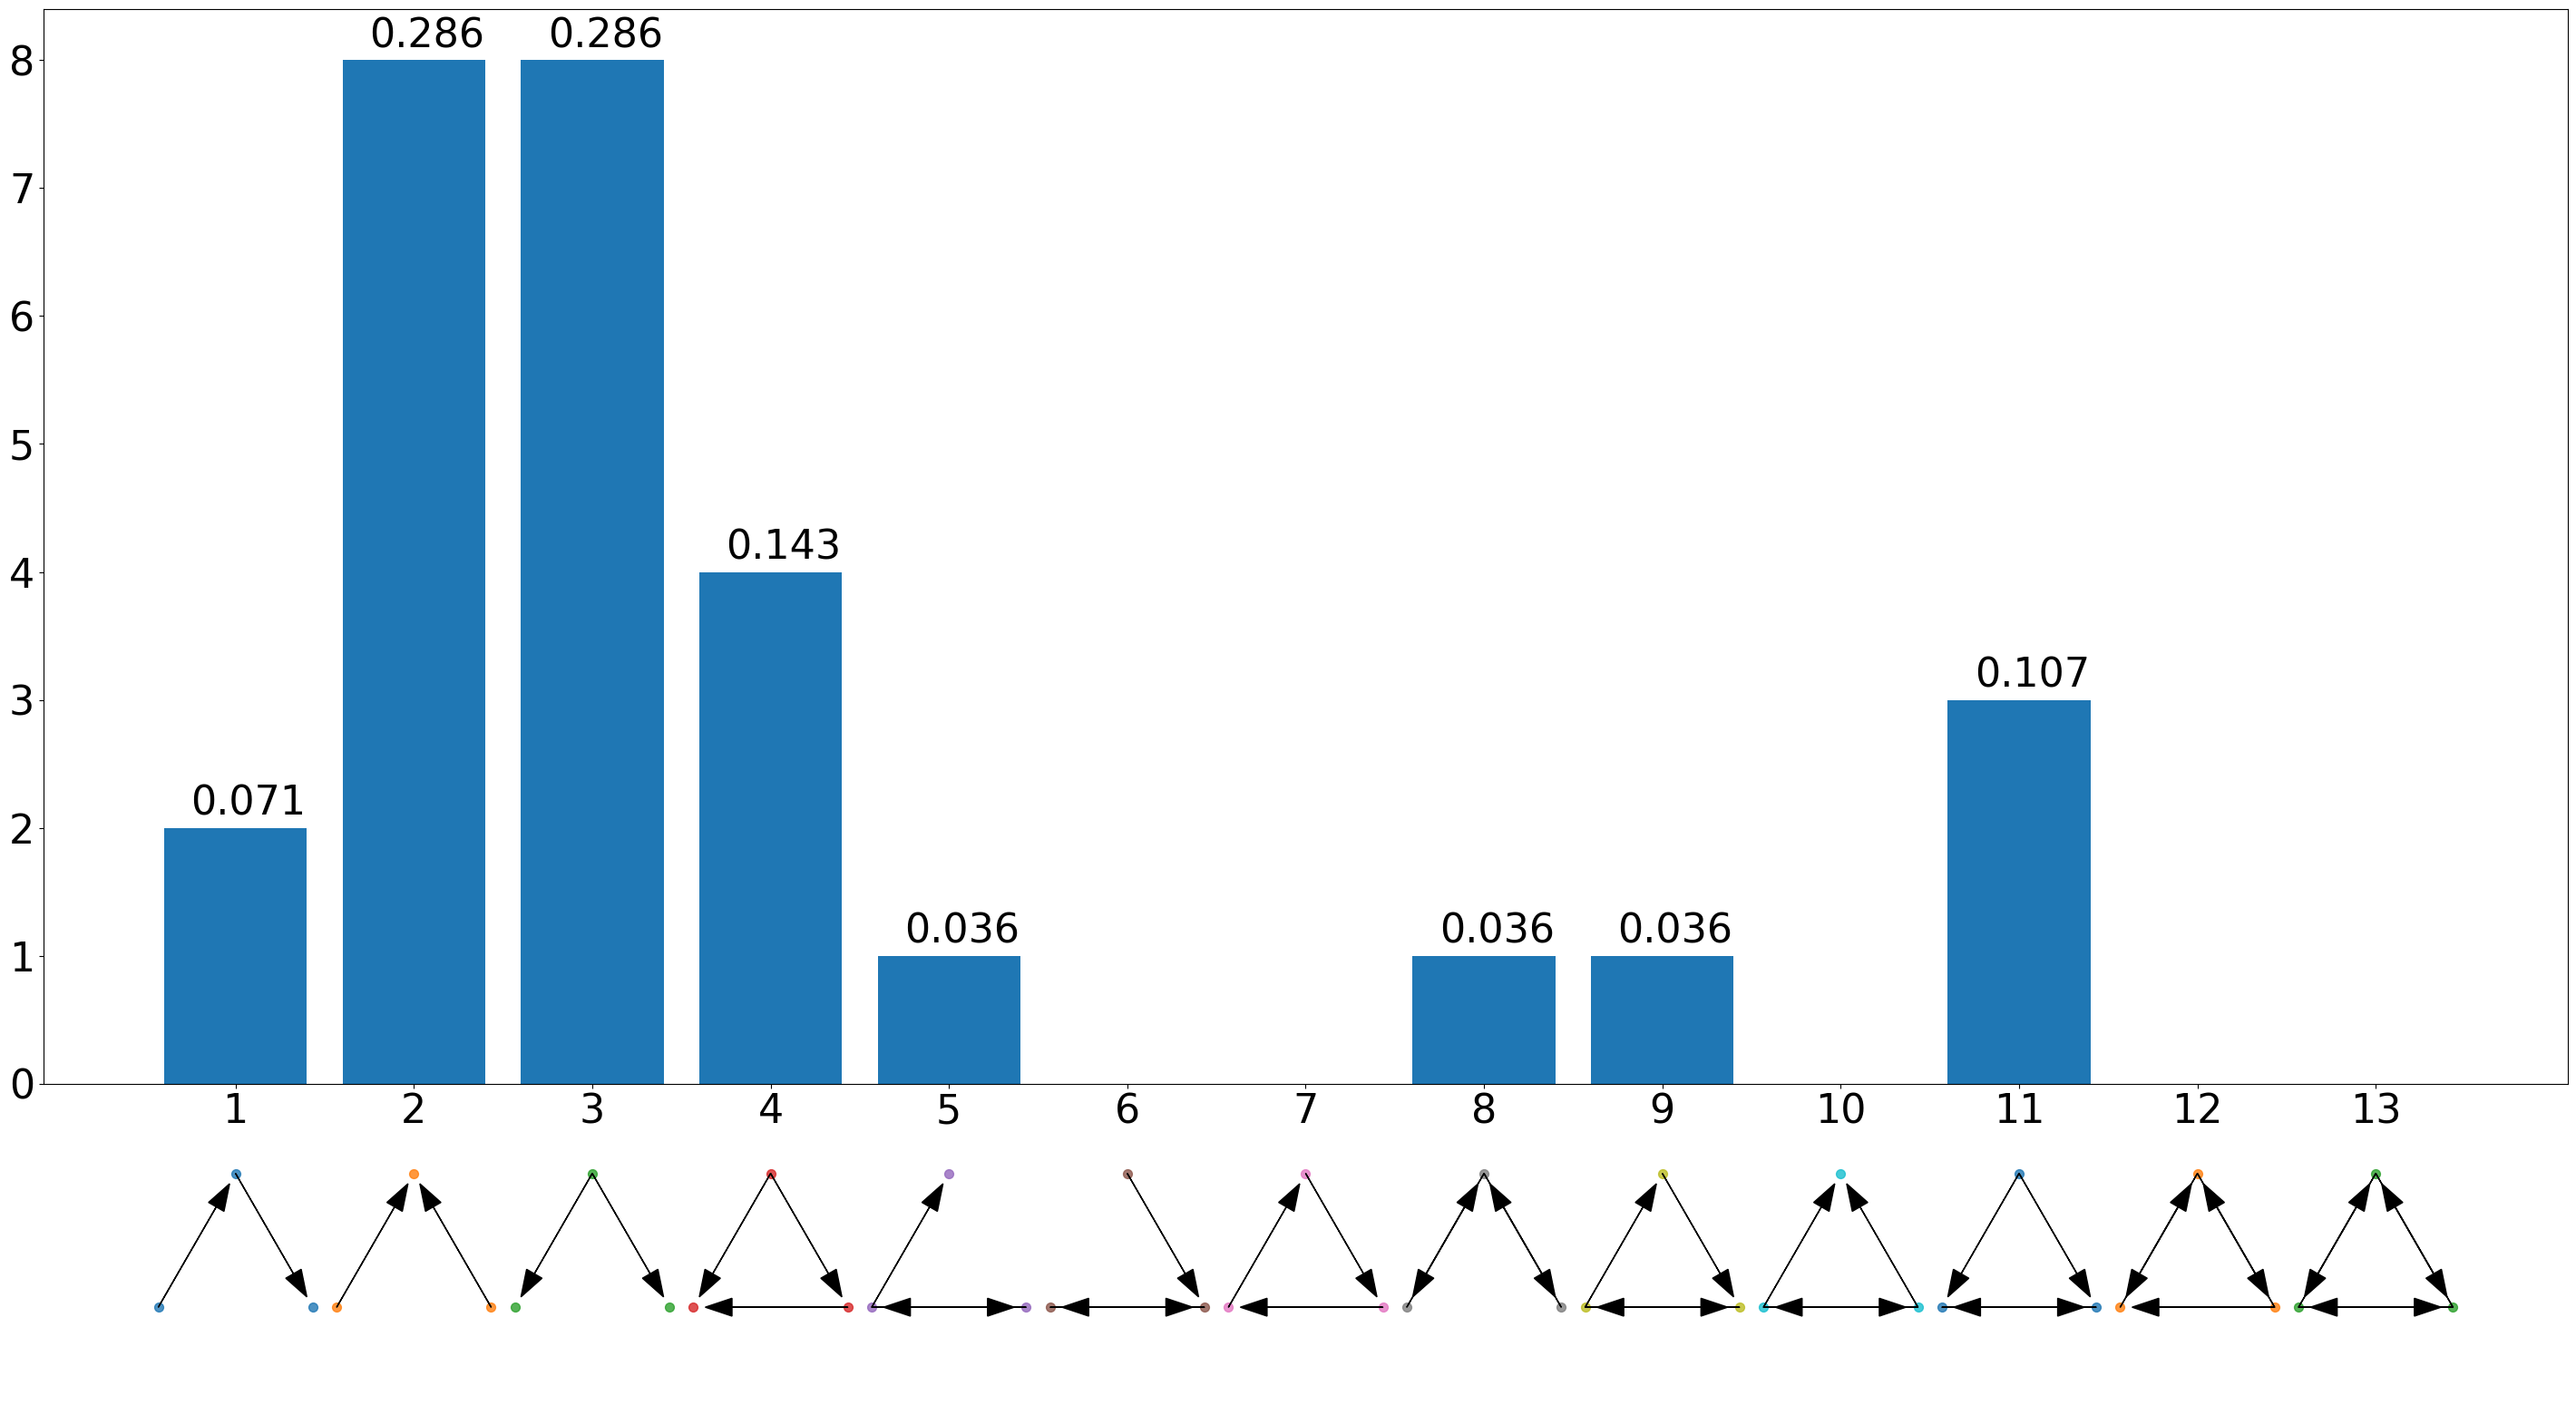

In [360]:
plt.rcParams.update({'font.size': 32})
_ = bar_motifs(Motifs(New_adj1))

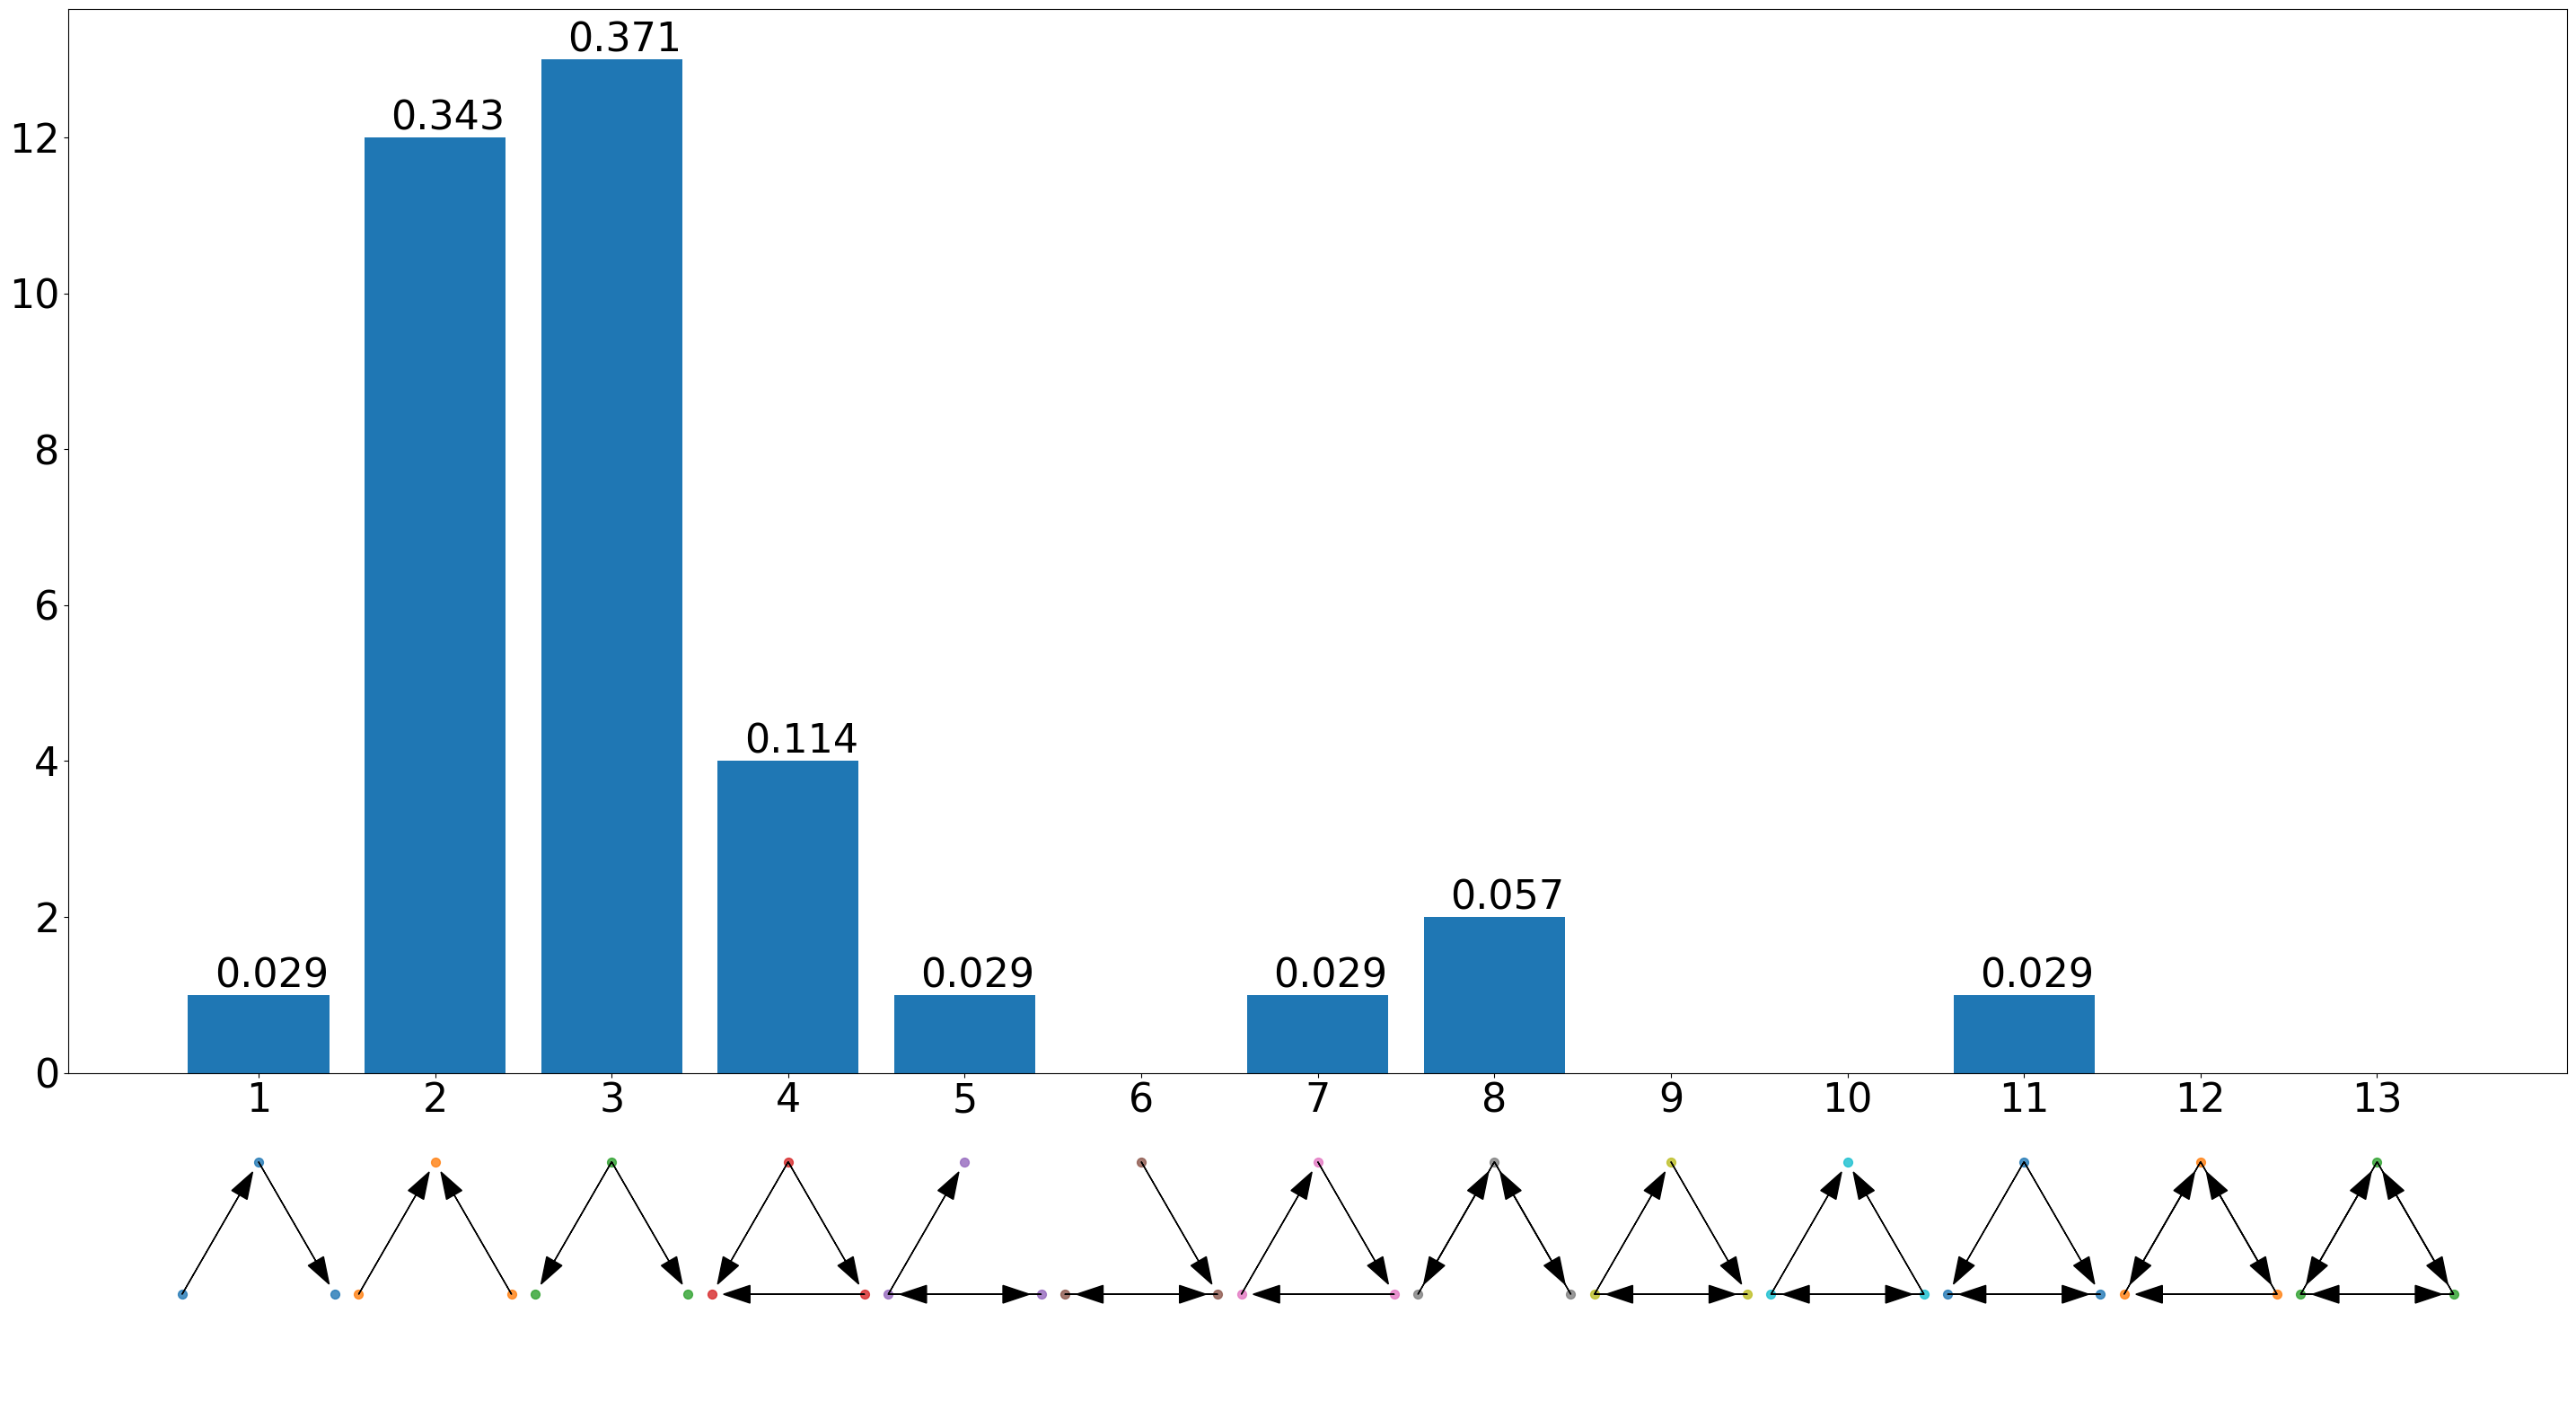

In [362]:
plt.rcParams.update({'font.size': 32})
_ = bar_motifs(Motifs(New_adj2))

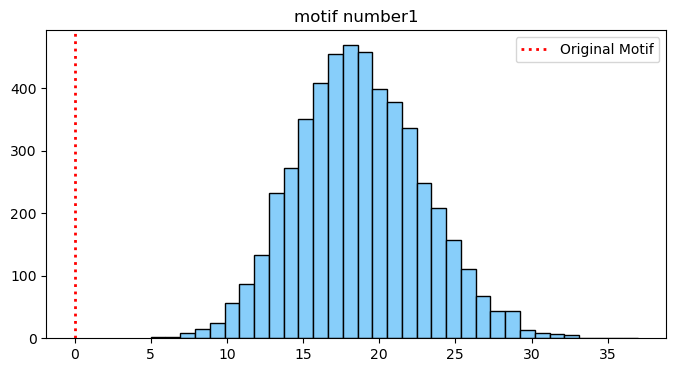

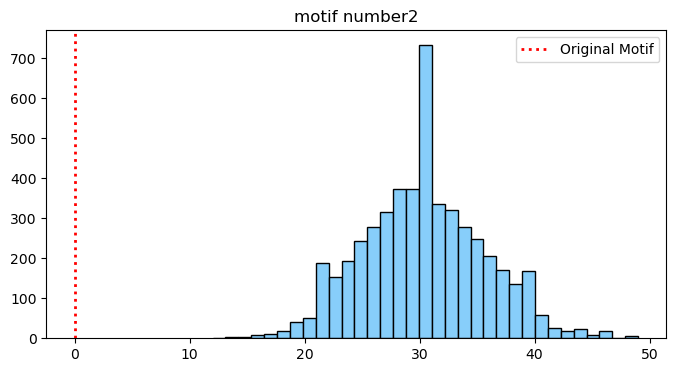

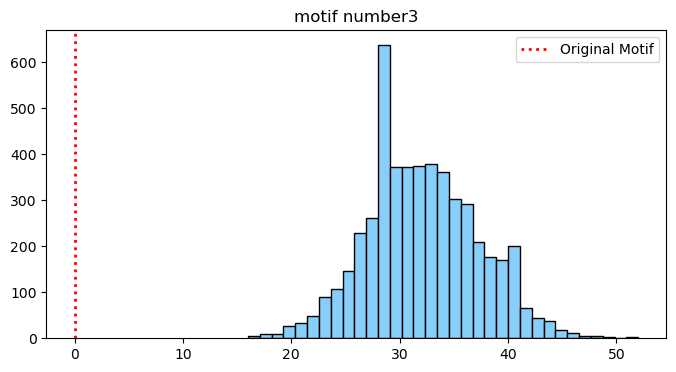

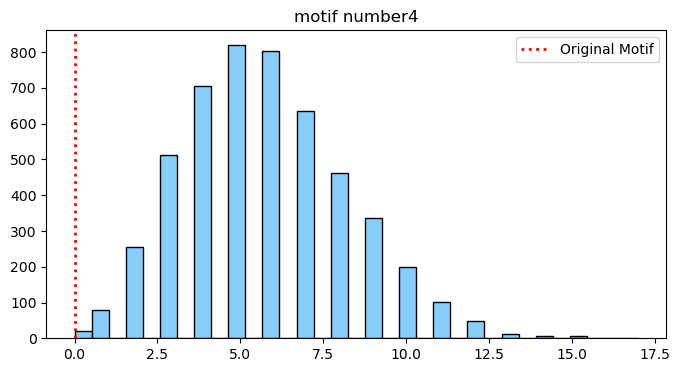

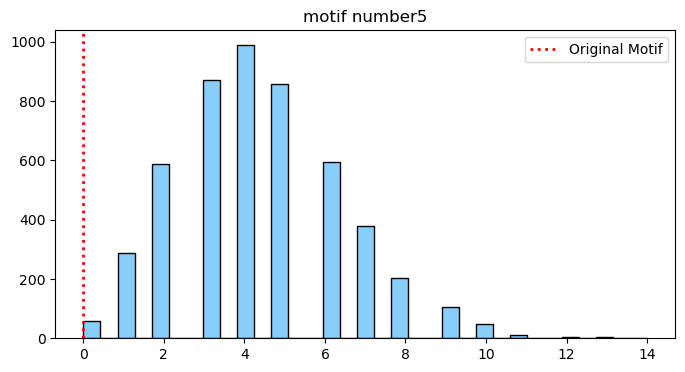

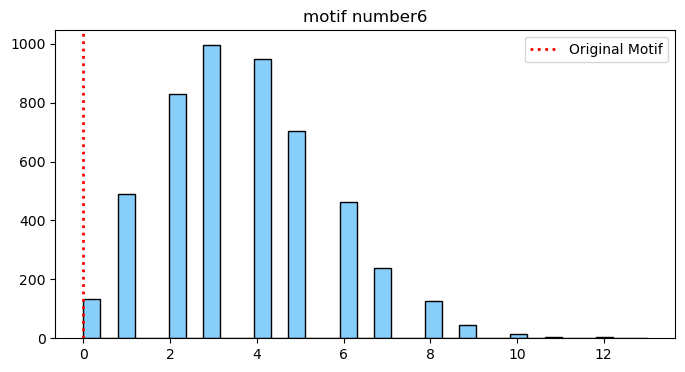

In [364]:
Plot_compare_Motifs(OUT_1, Motifs(New_adj1))

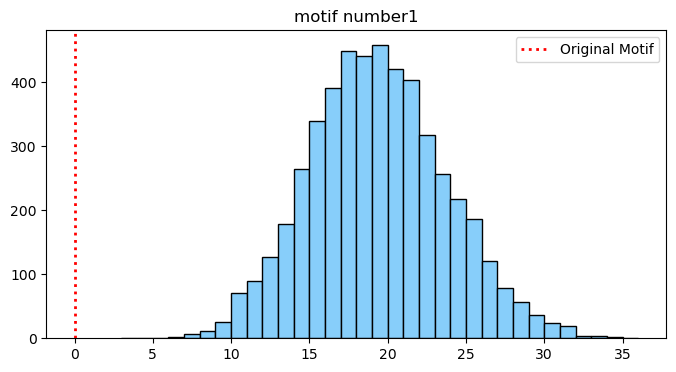

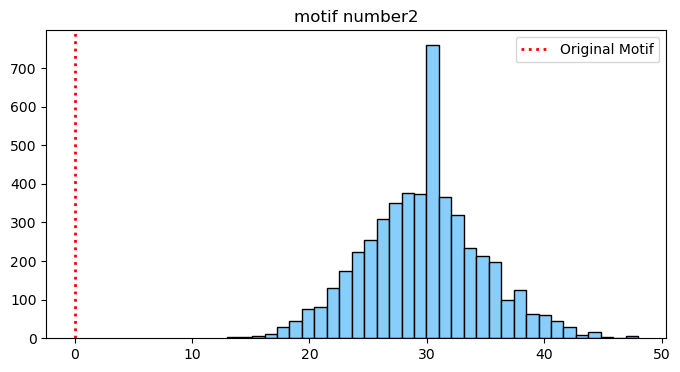

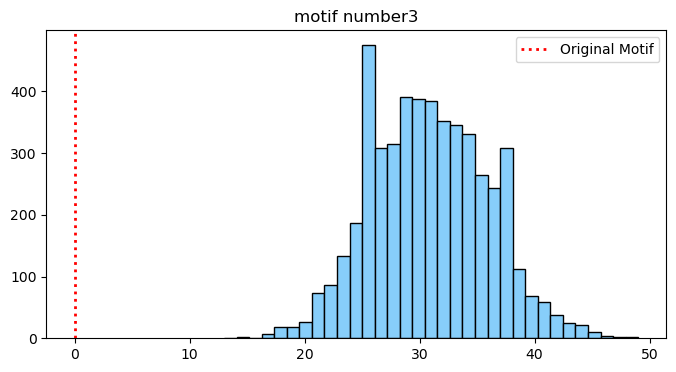

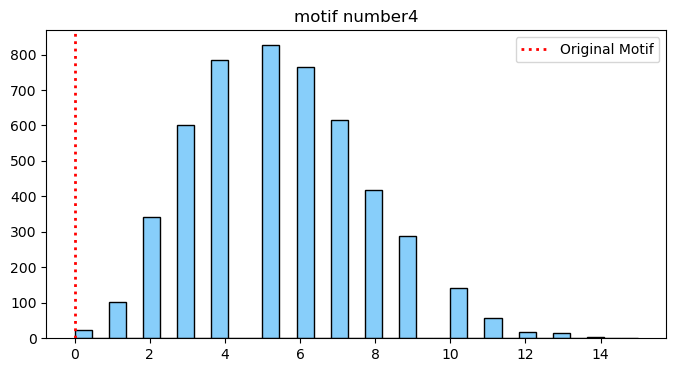

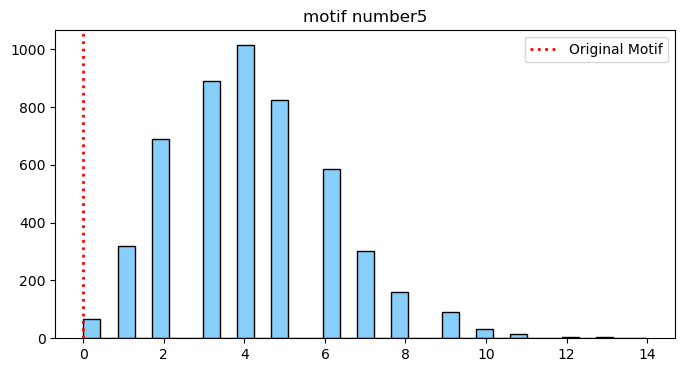

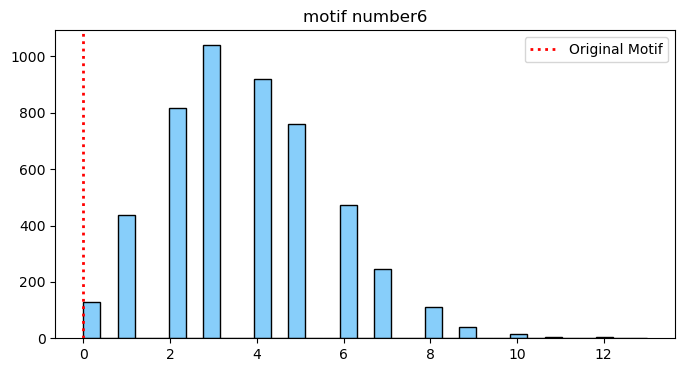

In [366]:
Plot_compare_Motifs(OUT_2, Motifs(New_adj2))